In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append('/capstor/users/cscs/xyixuan/PDM/')

In [8]:
from src.verbatim_eval.rouge_ttr import eval_rouge_ttr
from src.verbatim_eval.rouge_ttr import log_metric
from src.verbatim_eval.utils import load_inference_data
import numpy as np

/users/xyixuan/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
base_path = "/iopsstor/scratch/cscs/xyixuan/experiment"
repetitions_128  = np.array([1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128])
repetitions_2048 = np.array([0, 128, 256, 512, 1024, 2048])


In [10]:
goldfish_res_greedy = eval_rouge_ttr(
    base_path, 
    experiments=[
        "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000",
        "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000"
    ], 
    repetitions=[0],
    len_suffix=500,
    policy='greedy'
)

Processing repetition set 0:   0%|          | 0/1 [00:00<?, ?it/s]

Processing repetition set 0: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


In [11]:
log_metric(
    results=goldfish_res_greedy,
    metric='Rouge-L',
)


=== Repetition 0 Rouge-L ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.164 | Std = 0.024
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.159 | Std = 0.024


In [12]:
import numpy as np

def find_top_quantile_indices(TTR_scores, RougeL_scores, quantile=0.1):
    # Calculate the thresholds for top 10 percentile
    TTR_threshold = np.quantile(TTR_scores, 1 - quantile)
    RougeL_threshold = np.quantile(RougeL_scores, 1 - quantile)
    
    # Find indices that meet both criteria
    indices = [i for i in range(len(TTR_scores)) 
              if TTR_scores[i] >= TTR_threshold and RougeL_scores[i] >= RougeL_threshold]
    
    return indices

# Get the scores from your dictionary
TTR_scores = goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000'][0]['TTR_gen']['scores']
RougeL_scores = goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000'][0]['Rouge-L']['scores']

# Find the indices
top_indices = find_top_quantile_indices(TTR_scores, RougeL_scores)

print("Sequence indices in top 10 quantile for both metrics:", top_indices)
print("Total number of sequences found:", len(top_indices))

Sequence indices in top 10 quantile for both metrics: [462]
Total number of sequences found: 1


In [13]:
temp = load_inference_data(
    base_dir="/iopsstor/scratch/cscs/xyixuan/experiment/llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000/inference",
    rep=0,
    policy='greedy'
)

In [14]:
goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000'][0]['TTR_gen']['scores'][462]

np.float64(0.602)

In [15]:
goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000'][0]['Rouge-L']['scores'][462]

np.float64(0.19)

In [12]:
TTR_scores = goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000'][0]['TTR_gen']['scores']
Rouge_scores = goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000'][0]['Rouge-L']['scores']

# Find index where TTR ≈ 0.56 and Rouge-L ≈ 0.19
for idx, (ttr, rouge) in enumerate(zip(TTR_scores, Rouge_scores)):
    if ttr == 0.602 and rouge == 0.19:
        print(f"Found at index {idx}:")
        print(f"TTR: {ttr}")
        print(f"Rouge-L: {rouge}")

Found at index 462:
TTR: 0.602
Rouge-L: 0.19


In [22]:
from ignite.metrics import RougeL

ref_slice = tokenizer.decode(temp[462]['true_suffix'])
gen_slice = tokenizer.decode(temp[462]['generated_suffix'])

# ref = "the cat is on the mat"
# gen = "the cat sits on mat"

rouge_metric = RougeL(multiref="best")
rouge_metric.reset()
rouge_metric.update(([ref_slice], [[gen_slice]]))
rouge = rouge_metric.compute()
rouge

{'Rouge-L-P': 0.41104014598540145,
 'Rouge-L-R': 0.4505,
 'Rouge-L-F': 0.45050000000000007}

In [24]:
from src.verbatim_eval.LCS import find_longest_common_substrings

In [33]:
find_longest_common_substrings(temp[462]['true_suffix'], temp[462]['generated_suffix'])['max_length']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


3

In [17]:
from transformers import AutoTokenizer

In [18]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")
tokenizer.model_max_length = 200_000

In [19]:
print(tokenizer.decode(ref_slice[214: 217]))

, and the


In [20]:
print(tokenizer.decode(gen_slice))

Banches"[ THREEUM." The yellow ovels' artistic wearing greenery and
flamesresses, etc., on time, clothed in the half-trees, and the
adief represented in an elms of gilding and stealing with the
strange comical finery. Imperial marble pieces of gold paper surrounded by
air, the beauty of the scene. The whole structure, the luxury of
illuminous books, pictures upon the abridged of festoon, and the
table-candy pipes above the chariot and the alpenny seem to
enter into the loveliest. Strange, the plan days of multitudes, is a
tune deformed dissolves but bare; and it is idolatier after them
once to pay necessary steps or gaudy boots, as for over us the
goddess of ecclesiast.

Between the sitting and the late two or three of the little chapel, in
the near the barn and the sacred tree, quadruped, is led to the third
position of the village. The picturesque corner of the churches is the
wretched curtains of the top of the tall houses, with the corrupt
open windows, and the massive window shutt

In [23]:
log_metric(
    results=goldfish_res_greedy,
    metric='TTR_gen',
)


=== Repetition 128 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.454 | Std = 0.138

=== Repetition 256 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.445 | Std = 0.152

=== Repetition 512 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.460 | Std = 0.149

=== Repetition 1024 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.467 | Std = 0.137

=== Repetition 2048 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.471 | Std = 0.133


In [24]:
log_metric(
    results=goldfish_res_nucleus,
    metric='TTR_gen',
)


=== Repetition 128 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.461 | Std = 0.133

=== Repetition 256 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.454 | Std = 0.146

=== Repetition 512 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.461 | Std = 0.148

=== Repetition 1024 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.475 | Std = 0.133

=== Repetition 2048 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350  : Mean = 0.476 | Std = 0.126


In [33]:
goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][128]['NLL']['scores']

[0.5486438870429993,
 0.5412898063659668,
 0.6315194368362427,
 0.5191532969474792,
 0.500725507736206,
 0.6423547863960266,
 0.6927872896194458,
 0.4991455078125,
 0.3893992602825165,
 0.4712706506252289,
 0.6362016201019287,
 0.4947395622730255,
 0.6196539402008057,
 0.09292888641357422,
 0.5070594549179077,
 0.4897327423095703,
 0.14515304565429688,
 0.624954879283905,
 0.19905269145965576,
 0.6115468144416809,
 0.5851878523826599,
 0.5901587009429932,
 0.2770758867263794,
 0.4872317612171173,
 0.5167911052703857,
 0.48696714639663696,
 0.41740334033966064,
 0.611012876033783,
 0.591130793094635,
 0.5902518630027771,
 0.4076280891895294,
 0.23980925977230072,
 0.5796186923980713,
 0.46994492411613464,
 0.6956670880317688,
 0.583034336566925,
 0.43468329310417175,
 0.5680771470069885,
 0.5118036270141602,
 0.641156017780304,
 0.5494320392608643,
 0.3081902265548706,
 0.6352418661117554,
 0.595489501953125,
 0.18453113734722137,
 0.5975154042243958,
 0.5802376866340637,
 0.66623789072

In [35]:
goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][128]['Rouge-L']['scores']

array([0.154, 0.16 , 0.192, 0.294, 0.16 , 0.152, 0.154, 0.16 , 0.17 ,
       0.154, 0.184, 0.152, 0.172, 0.738, 0.15 , 0.184, 0.316, 0.178,
       0.15 , 0.192, 0.132, 0.14 , 0.27 , 0.17 , 0.164, 0.132, 0.202,
       0.18 , 0.134, 0.202, 0.152, 0.218, 0.19 , 0.162, 0.154, 0.166,
       0.154, 0.182, 0.174, 0.222, 0.198, 0.17 , 0.148, 0.174, 0.152,
       0.182, 0.16 , 0.14 , 0.152, 0.144, 0.184, 0.132, 0.18 , 0.176,
       0.21 , 0.178, 0.21 , 0.142, 0.158, 0.178, 0.176, 0.166, 0.176,
       0.164, 0.2  , 0.162, 0.168, 0.15 , 0.184, 0.188, 0.14 , 0.172,
       0.166, 0.178, 0.178, 0.232, 0.08 , 0.184, 0.11 , 0.172, 0.172,
       0.166, 0.15 , 0.162, 0.166, 0.176, 0.154, 0.162, 0.182, 0.382,
       0.168, 0.152, 0.162, 0.198, 0.17 , 0.09 , 0.15 , 0.198, 0.188,
       0.17 , 0.436, 0.178, 0.154, 0.148, 0.168, 0.154, 0.154, 0.16 ,
       0.186, 0.176, 0.152, 0.194, 0.188, 0.134, 0.19 , 0.166, 0.154,
       0.172, 0.164, 0.172, 0.184, 0.184, 0.178, 0.176, 0.168, 0.126,
       0.158, 0.184,

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Statistical Tests for Correlation between NLL and Rouge-L scores:

Pearson Correlation:
r = -0.1668
p-value = 0.0002

Spearman Correlation:
rho = -0.3232
p-value = 0.0000


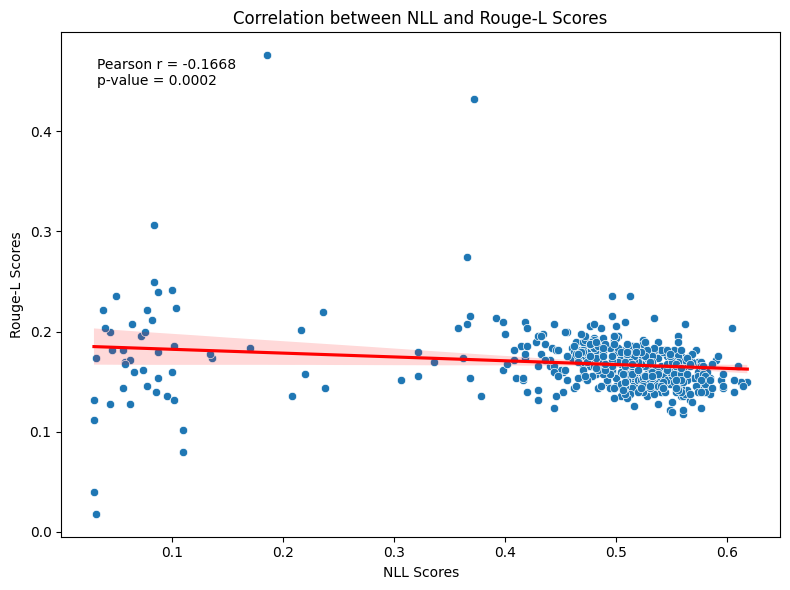

In [49]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
rep = 2048
nll_scores = goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][rep]['TTR_gen']['scores']
rouge_scores = goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][rep]['Rouge-L']['scores']

# Calculate correlations and their significance
pearson_r, pearson_p = stats.pearsonr(nll_scores, rouge_scores)
spearman_r, spearman_p = stats.spearmanr(nll_scores, rouge_scores)

# Print results
print("Statistical Tests for Correlation between NLL and Rouge-L scores:")
print("\nPearson Correlation:")
print(f"r = {pearson_r:.4f}")
print(f"p-value = {pearson_p:.4f}")

print("\nSpearman Correlation:")
print(f"rho = {spearman_r:.4f}")
print(f"p-value = {spearman_p:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nll_scores, y=rouge_scores)
sns.regplot(x=nll_scores, y=rouge_scores, scatter=False, color='red')

plt.xlabel('NLL Scores')
plt.ylabel('Rouge-L Scores')
plt.title('Correlation between NLL and Rouge-L Scores')

# Add correlation coefficient to plot
plt.text(0.05, 0.95, f'Pearson r = {pearson_r:.4f}\np-value = {pearson_p:.4f}', 
         transform=plt.gca().transAxes, 
         verticalalignment='top')

plt.tight_layout()
plt.show()

In [26]:
log_metrics(goldfish_res_greedy)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350 ===
  Repetition 128
    NLL        | Mean = 0.526, Std = 0.221
    Rouge-L    | Mean = 0.171, Std = 0.042
    TTR_ref    | Mean = 0.541, Std = 0.055
    TTR_gen    | Mean = 0.454, Std = 0.138
  Repetition 256
    NLL        | Mean = 0.503, Std = 0.134
    Rouge-L    | Mean = 0.171, Std = 0.040
    TTR_ref    | Mean = 0.541, Std = 0.053
    TTR_gen    | Mean = 0.445, Std = 0.152
  Repetition 512
    NLL        | Mean = 0.521, Std = 0.474
    Rouge-L    | Mean = 0.167, Std = 0.030
    TTR_ref    | Mean = 0.539, Std = 0.045
    TTR_gen    | Mean = 0.460, Std = 0.149
  Repetition 1024
    NLL        | Mean = 0.535, Std = 0.676
    Rouge-L    | Mean = 0.168, Std = 0.038
    TTR_ref    | Mean = 0.539, Std = 0.048
    TTR_gen    | Mean = 0.467, Std = 0.137
  Repetition 2048
    NLL        | Mean = 0.485, Std = 0.110
    Rouge-L    | Mean = 0.168, Std = 0.031
    TTR_ref    | Mean = 0.538, Std = 0.049
    TT

In [27]:
log_metrics(goldfish_res_nucleus)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350 ===
  Repetition 128
    NLL        | Mean = inf, Std = nan
    Rouge-L    | Mean = 0.169, Std = 0.039
    TTR_ref    | Mean = 0.541, Std = 0.055
    TTR_gen    | Mean = 0.461, Std = 0.133
  Repetition 256
    NLL        | Mean = 0.094, Std = 0.030
    Rouge-L    | Mean = 0.171, Std = 0.039
    TTR_ref    | Mean = 0.541, Std = 0.053
    TTR_gen    | Mean = 0.454, Std = 0.146
  Repetition 512
    NLL        | Mean = inf, Std = nan
    Rouge-L    | Mean = 0.165, Std = 0.027
    TTR_ref    | Mean = 0.539, Std = 0.045
    TTR_gen    | Mean = 0.461, Std = 0.148
  Repetition 1024
    NLL        | Mean = inf, Std = nan
    Rouge-L    | Mean = 0.168, Std = 0.036
    TTR_ref    | Mean = 0.539, Std = 0.048
    TTR_gen    | Mean = 0.475, Std = 0.133
  Repetition 2048
    NLL        | Mean = 0.088, Std = 0.028
    Rouge-L    | Mean = 0.168, Std = 0.030
    TTR_ref    | Mean = 0.538, Std = 0.049
    TTR_gen    | M

In [163]:
goldfish_res_nucleus = eval_metrics(
    base_path, 
    experiments=[
        # "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000",
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000", 
        "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350",
    ], 
    repetitions=repetitions_2048,
    len_suffix=500,
    policy='nucleus'
)

Processing repetition set 128:   0%|          | 0/5 [00:00<?, ?it/s]

/users/xyixuan/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
Processing repetition set 2048: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


In [164]:
log_metrics(goldfish_res_nucleus)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350 ===
  Repetition 128
    NLL        | Mean = inf, Std = nan
    Rouge-L    | Mean = 0.169, Std = 0.039
    TTR_ref    | Mean = 0.541, Std = 0.055
    TTR_gen    | Mean = 0.461, Std = 0.133
  Repetition 256
    NLL        | Mean = 0.094, Std = 0.030
    Rouge-L    | Mean = 0.171, Std = 0.039
    TTR_ref    | Mean = 0.541, Std = 0.053
    TTR_gen    | Mean = 0.454, Std = 0.146
  Repetition 512
    NLL        | Mean = inf, Std = nan
    Rouge-L    | Mean = 0.165, Std = 0.027
    TTR_ref    | Mean = 0.539, Std = 0.045
    TTR_gen    | Mean = 0.461, Std = 0.148
  Repetition 1024
    NLL        | Mean = inf, Std = nan
    Rouge-L    | Mean = 0.168, Std = 0.036
    TTR_ref    | Mean = 0.539, Std = 0.048
    TTR_gen    | Mean = 0.475, Std = 0.133
  Repetition 2048
    NLL        | Mean = 0.088, Std = 0.028
    Rouge-L    | Mean = 0.168, Std = 0.030
    TTR_ref    | Mean = 0.538, Std = 0.049
    TTR_gen    | M

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_nll_distributions(results_dict, model_key, bins=50, alpha=0.5):
    """
    Plot an overlaid histogram of NLL scores for each key in results_dict[model_key].
    
    Parameters
    ----------
    results_dict : dict
        The dictionary containing all model results (e.g., goldfish_res_greedy).
    model_key : str
        The dictionary key for the specific model 
        (e.g., 'llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000').
    bins : int, optional
        Number of bins for each histogram. Default is 50.
    alpha : float, optional
        Transparency for the histogram bars. Lower alpha allows multiple
        distributions to be viewed more easily when they overlap. Default is 0.5.
    """
    
    # Create a figure
    plt.figure(figsize=(8, 6))
    
    # You can define a palette of colors to cycle through
    colors = ["blue", "orange", "green", "red", "purple", 
              "brown", "pink", "gray", "olive", "cyan"]
    
    # Convert the keys to a list to fix their iteration order
    subkeys = list(results_dict[model_key].keys())
    
    for i, k in enumerate(subkeys):
        all_scores = np.array(results_dict[model_key][k]['NLL']['scores'])
        
        # Plot a 'stepfilled' histogram with boundaries
        plt.hist(
            all_scores,
            bins=bins,
            alpha=alpha,
            color=colors[i % len(colors)],
            edgecolor='black',         # boundary color
            histtype='stepfilled',     # solid fill with boundary
            label=f"{k}"
        )
    
    plt.title("Distribution of NLL Scores by Key")
    plt.xlabel("NLL Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, alpha=0.7)
    plt.show()



In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

def plot_nll_distributions_ridge(results_dict, model_key, upper_quantile=1.):
    """
    Create a ridge plot of NLL distributions for each subkey in results_dict[model_key].
    
    Parameters
    ----------
    results_dict : dict
        The dictionary containing all model results (e.g., goldfish_res_greedy).
    model_key : str
        The dictionary key for the specific model 
        (e.g., 'llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000').
    """

    # 1. Reshape your data into a DataFrame with columns: [ 'subkey', 'nll' ]
    data_records = []
    for subkey, value_dict in results_dict[model_key].items():
        scores = np.array(value_dict['NLL']['scores'])
        for score in scores:
            data_records.append({'subkey': subkey, 'Negative Log Likelihood': score})
    
    df = pd.DataFrame(data_records)

    # (Optional) Clip outliers or large values
    lower = df["Negative Log Likelihood"].quantile(0.00)
    upper = df["Negative Log Likelihood"].quantile(upper_quantile)
    df["Trimmed Negative Log Likelihood"] = df["Negative Log Likelihood"].clip(lower, upper)

    # 2. Initialize a palette and a FacetGrid
    unique_subkeys = df["subkey"].unique()
    pal = sns.cubehelix_palette(len(unique_subkeys), rot=-.25, light=.7)
    g = sns.FacetGrid(
        df, 
        row="subkey",                     # each subkey in its own row
        hue="subkey",                     # color by subkey
        aspect=15,                        # make plots much wider than tall
        height=.5,                        # the vertical height of each plot
        palette=pal
    )

    # 3. Plot the ridgeline KDEs (filled, then outline)
    g.map(
        sns.kdeplot, 
        "Trimmed Negative Log Likelihood",
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1, 
        linewidth=1.5
    )

    g.map(
        sns.kdeplot, 
        "Trimmed Negative Log Likelihood", 
        clip_on=False, 
        color="w", 
        lw=2, 
        bw_adjust=.5
    )

    # 4. Reference line at y=0 (for each row)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # 5. Define and apply a small labeling function to place text within each subplot
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, 
                fontweight="bold", 
                color=color, 
                ha="left", 
                va="center", 
                transform=ax.transAxes)

    # Map the labeling function to one of the variables (not the trimmed one!)
    g.map(label, "Negative Log Likelihood")

    # 6. Adjust the subplot spacing so that subplots overlap
    g.figure.subplots_adjust(hspace=-.05)

    # 7. Remove or simplify unneeded axis details
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # --- ADDING TITLE AND AXIS LABELS ---
    # 8. Set a main title for the entire figure
    g.fig.suptitle(
        model_key, 
        x=0.5,              # center the title
        y=1.03,             # adjust if it overlaps the topmost subplot
        fontsize=10
    )
    
    # 9. Optionally adjust the top margin to ensure the title fits
    g.figure.subplots_adjust(top=0.95)
    
    # 10. Set the x-axis label for all facets
    g.set_axis_labels("Trimmed Negative Log Likelihood", "")

    plt.show()


/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwar

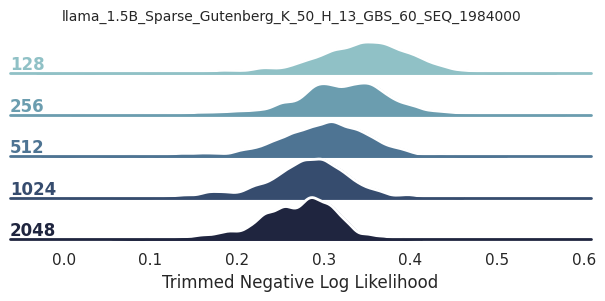

In [157]:
plot_nll_distributions_ridge(
    results_dict=goldfish_res_greedy,
    model_key="llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000",
)

/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwar

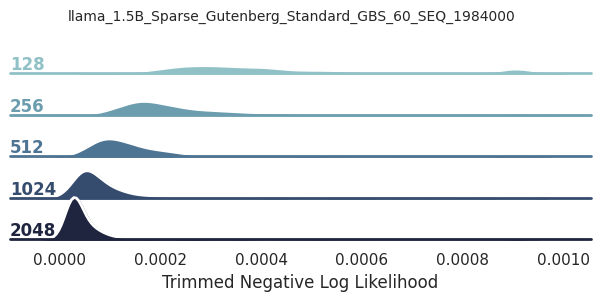

In [158]:
plot_nll_distributions_ridge(
    results_dict=goldfish_res_greedy,
    model_key="llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000",
    upper_quantile=0.96
)

In [23]:
log_metrics(goldfish_res_greedy)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000 ===
  Repetition 128
    NLL        | Mean = 0.336, Std = 0.074
    Rouge-L    | Mean = 0.300, Std = 0.139
    TTR_ref    | Mean = 0.541, Std = 0.055
    TTR_gen    | Mean = 0.550, Std = 0.047
  Repetition 256
    NLL        | Mean = 0.320, Std = 0.064
    Rouge-L    | Mean = 0.283, Std = 0.119
    TTR_ref    | Mean = 0.541, Std = 0.053
    TTR_gen    | Mean = 0.557, Std = 0.046
  Repetition 512
    NLL        | Mean = 0.296, Std = 0.061
    Rouge-L    | Mean = 0.284, Std = 0.124
    TTR_ref    | Mean = 0.539, Std = 0.045
    TTR_gen    | Mean = 0.562, Std = 0.041
  Repetition 1024
    NLL        | Mean = 0.278, Std = 0.056
    Rouge-L    | Mean = 0.287, Std = 0.119
    TTR_ref    | Mean = 0.539, Std = 0.048
    TTR_gen    | Mean = 0.565, Std = 0.044
  Repetition 2048
    NLL        | Mean = 0.267, Std = 0.049
    Rouge-L    | Mean = 0.281, Std = 0.116
    TTR_ref    | Mean = 0.538, Std = 0.049
    TT

In [24]:
goldfish_res_nucleus = eval_metrics(
    base_path, 
    experiments=[
        "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000",
        "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000", 
    ], 
    repetitions=repetitions_2048,
    len_suffix=500,
    policy='nucleus'
)

Processing repetition set 128:   0%|          | 0/5 [00:00<?, ?it/s]

Processing repetition set 2048: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


In [25]:
log_metrics(goldfish_res_nucleus)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000 ===
  Repetition 128
    NLL        | Mean = 0.013, Std = 0.006
    Rouge-L    | Mean = 0.301, Std = 0.142
    TTR_ref    | Mean = 0.541, Std = 0.055
    TTR_gen    | Mean = 0.551, Std = 0.052
  Repetition 256
    NLL        | Mean = 0.011, Std = 0.006
    Rouge-L    | Mean = 0.283, Std = 0.124
    TTR_ref    | Mean = 0.541, Std = 0.053
    TTR_gen    | Mean = 0.560, Std = 0.046
  Repetition 512
    NLL        | Mean = 0.009, Std = 0.004
    Rouge-L    | Mean = 0.283, Std = 0.122
    TTR_ref    | Mean = 0.539, Std = 0.045
    TTR_gen    | Mean = 0.566, Std = 0.040
  Repetition 1024
    NLL        | Mean = 0.008, Std = 0.004
    Rouge-L    | Mean = 0.285, Std = 0.115
    TTR_ref    | Mean = 0.539, Std = 0.048
    TTR_gen    | Mean = 0.567, Std = 0.044
  Repetition 2048
    NLL        | Mean = 0.007, Std = 0.004
    Rouge-L    | Mean = 0.280, Std = 0.116
    TTR_ref    | Mean = 0.538, Std = 0.049
    TT

In [15]:
goldfish_res = eval_metrics(
    base_path, 
    experiments=[
        "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000",
        "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000",
    ], 
    repetitions=repetitions_2048,
    len_suffix=500
)

Processing repetition set 128:   0%|          | 0/5 [00:00<?, ?it/s]

Processing repetition set 2048: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


In [16]:
log_metrics(goldfish_res, metric='Rouge-L')


=== Repetition 128 Rouge-L ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.300 | Std = 0.139
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.992 | Std = 0.077

=== Repetition 256 Rouge-L ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.283 | Std = 0.119
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.992 | Std = 0.074

=== Repetition 512 Rouge-L ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.284 | Std = 0.124
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.991 | Std = 0.069

=== Repetition 1024 Rouge-L ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.287 | Std = 0.119
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.995 | Std = 0.048

=== Repetition 2048 Rouge-L ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.281 | Std = 0.116
  llama_1.5B_Sparse_Gutenberg_Standar

In [17]:
log_metrics(goldfish_res, metric='TTR_ref')


=== Repetition 128 TTR_ref ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.541 | Std = 0.055
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.541 | Std = 0.055

=== Repetition 256 TTR_ref ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.541 | Std = 0.053
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.541 | Std = 0.053

=== Repetition 512 TTR_ref ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.539 | Std = 0.045
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.539 | Std = 0.045

=== Repetition 1024 TTR_ref ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.539 | Std = 0.048
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.539 | Std = 0.048

=== Repetition 2048 TTR_ref ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.538 | Std = 0.049
  llama_1.5B_Sparse_Gutenberg_Standar

In [18]:
log_metrics(goldfish_res, metric='TTR_gen')


=== Repetition 128 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.550 | Std = 0.047
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.541 | Std = 0.055

=== Repetition 256 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.557 | Std = 0.046
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.541 | Std = 0.053

=== Repetition 512 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.562 | Std = 0.041
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.539 | Std = 0.046

=== Repetition 1024 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.565 | Std = 0.044
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000   : Mean = 0.539 | Std = 0.048

=== Repetition 2048 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000  : Mean = 0.566 | Std = 0.040
  llama_1.5B_Sparse_Gutenberg_Standar

In [19]:
import matplotlib.pyplot as plt

def plot_ttr_dists(
    goldfish_res: dict,
    repetitions: list[int],
    metric: str,
):
    """
    Plot the distributions of TTR (Type-Token Ratio) scores for multiple repetitions.

    Parameters
    ----------
    expr : str
        An identifier or label for the experiment/model grouping.
    repetitions : list[int]
        A list of repetition indices (e.g., [1, 2, 3, 4]).
    goldfish_res : dict
        Nested dict of model evaluation results. For example:
            goldfish_res[model_name][rep]['TTR_gen']['scores'] = np.array(...)
            goldfish_res[model_name][rep]['TTR_ref']['scores'] = np.array(...)
    """
    n_reps = len(repetitions)
    
    # Decide on subplot arrangement: up to 3 columns, rows as needed
    n_cols = min(3, n_reps)  
    n_rows = (n_reps + n_cols - 1) // n_cols  # "ceiling" division

    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    fig.suptitle(f"{metric} Distributions")

    # If multiple rows, flatten axes to 1D for easy indexing
    if n_rows > 1:
        axes = axes.ravel()

    # Plot each repetition
    for idx, rep in enumerate(repetitions):
        # For example, we have two model outputs + reference:
        #   model1 = "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60"
        #   model2 = "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"
        # We assume you want TTR_gen from both, and TTR_ref from the second.
        if metric == "TTR":
            # arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60"][rep]["TTR_gen"]["scores"]
            # arr2 = goldfish_res["llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"][rep]["TTR_gen"]["scores"]
            # arr3 = goldfish_res["llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"][rep]["TTR_ref"]["scores"]

            # ax = axes[idx]
            
            # # Plot histograms
            # ax.hist(arr1, bins=30, alpha=0.5, label='Standard TTR_gen')
            # ax.hist(arr2, bins=30, alpha=0.5, label='Goldfish TTR_gen')
            # ax.hist(arr3, bins=30, alpha=0.5, label='Reference TTR_ref')

            arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"][rep]["TTR_gen"]["scores"]
            arr2 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"][rep]["TTR_ref"]["scores"]

            ax = axes[idx]
            
            # Plot histograms
            ax.hist(arr1, bins=30, alpha=0.5, label='Standard TTR_gen')
            ax.hist(arr2, bins=30, alpha=0.5, label='Reference TTR_ref')

            ax.set_xlabel("TTR Score")

        elif metric == "Rouge-L":
            # arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60"][rep]["Rouge-L"]["scores"]
            # arr2 = goldfish_res["llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"][rep]["Rouge-L"]["scores"]

            # ax = axes[idx]
            
            # # Plot histograms
            # ax.hist(arr1, bins=30, alpha=0.5, label='Standard Rouge-L')
            # ax.hist(arr2, bins=30, alpha=0.5, label='Goldfish Rouge-L')

            arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"][rep]["Rouge-L"]["scores"]
            ax = axes[idx]
            ax.hist(arr1, bins=30, alpha=0.5, label='Standard Rouge-L')

            ax.set_xlabel("Rouge-L Score")
            ax.set_xlim(0, 1)  # Set y-axis limit to 500
            ax.set_yscale('log')

        else:
            raise ValueError(f"Unknown metric: {metric}, available options: 'TTR', 'Rouge-L'")

        ax.set_ylabel("Frequency")
        ax.set_title(f"Rep {rep}")
        ax.legend()
        ax.grid(axis='y', alpha=0.75)
        # Example of setting log scale on Y-axis:
        # ax.set_yscale('log')

    # Remove any unused subplots (e.g., if n_reps < n_rows*n_cols)
    for idx in range(n_reps, n_rows * n_cols):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


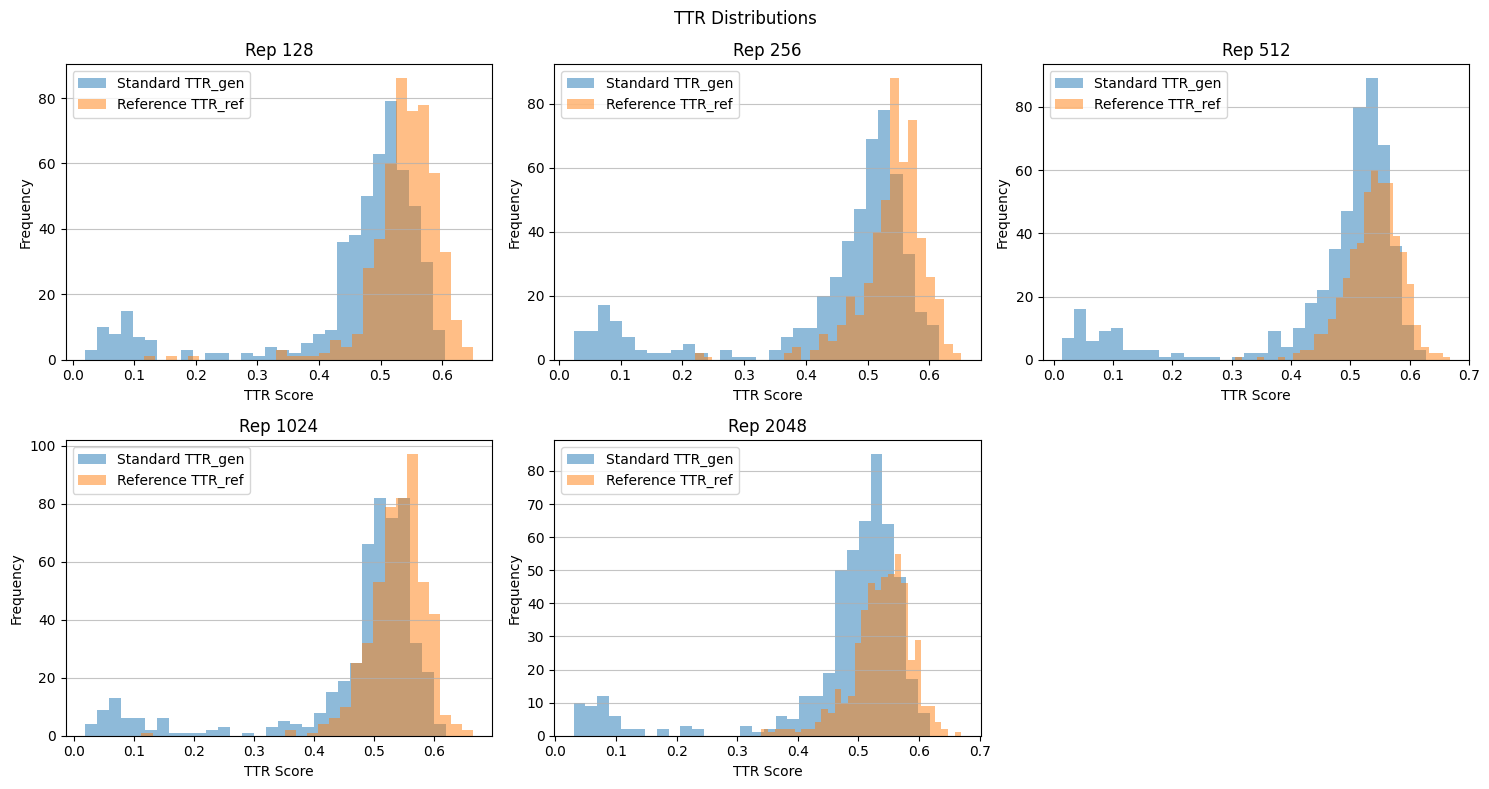

In [17]:
plot_ttr_dists(goldfish_res, repetitions_2048, metric='TTR')

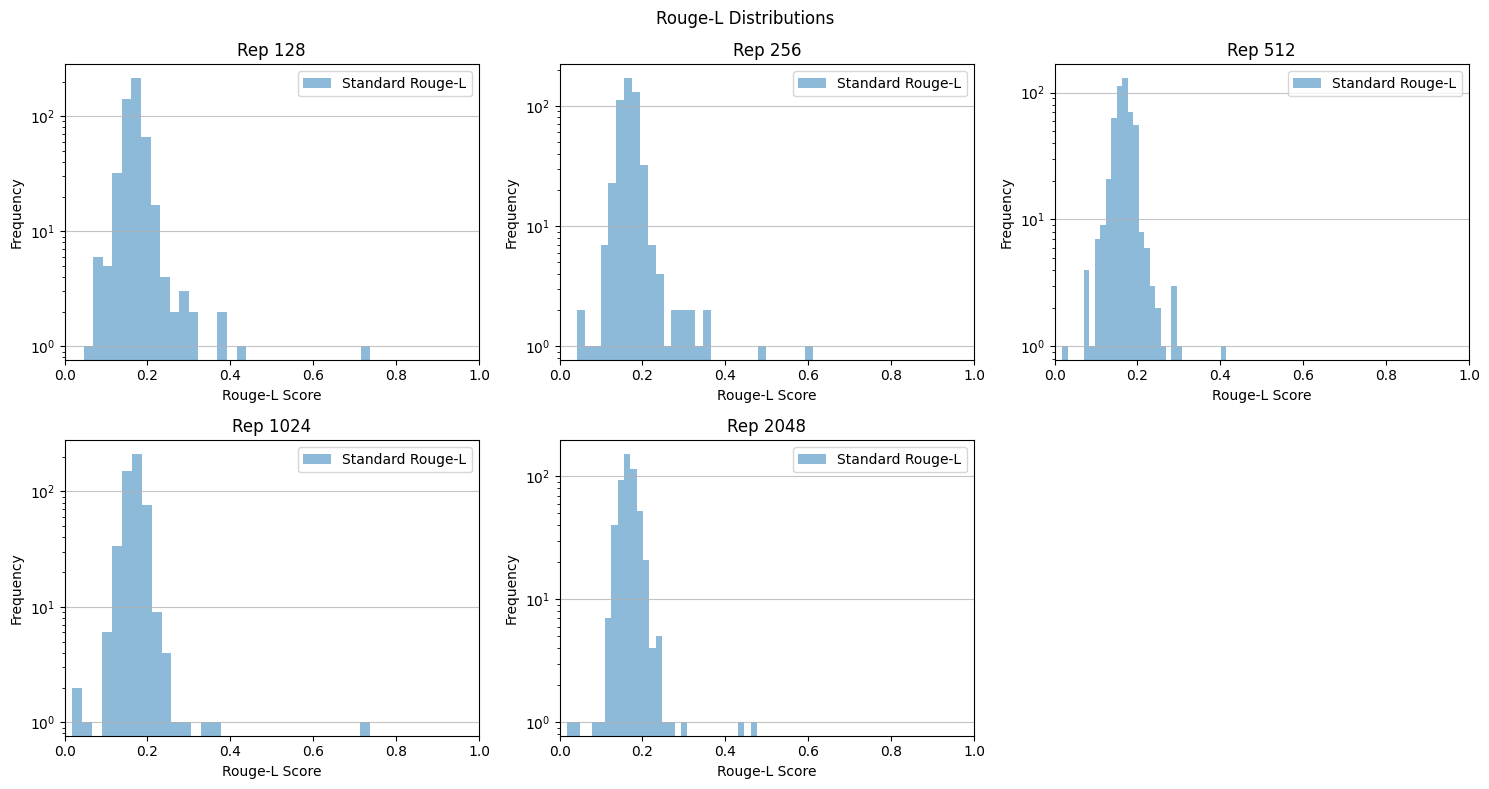

In [20]:
plot_ttr_dists(goldfish_res, repetitions_2048, metric='Rouge-L')

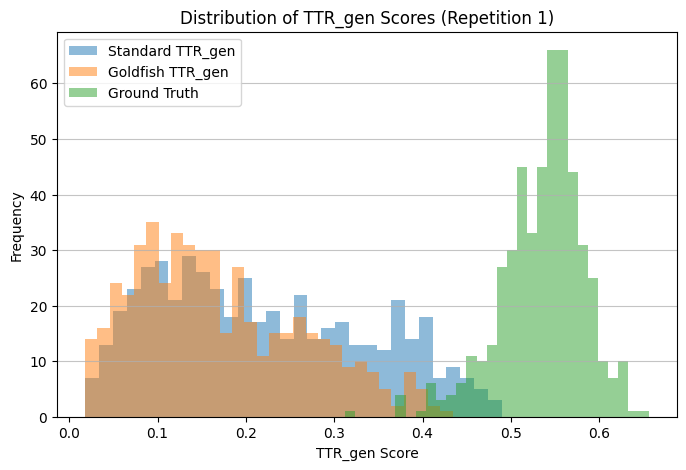

In [179]:
import matplotlib.pyplot as plt
import numpy as np

rep = 1
# Extract the scores
arr1 = goldfish_res['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60'][rep]['TTR_gen']['scores']
arr2 = goldfish_res['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60'][rep]['TTR_gen']['scores']
arr3 = goldfish_res['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60'][rep]['TTR_ref']['scores']

# Plot histograms
plt.figure(figsize=(8, 5))
plt.hist(arr1, bins=30, alpha=0.5, label='Standard TTR_gen')
plt.hist(arr2, bins=30, alpha=0.5, label='Goldfish TTR_gen')
plt.hist(arr3, bins=30, alpha=0.5, label='Ground Truth')

plt.title(f"Distribution of TTR_gen Scores (Repetition {rep})")
plt.xlabel("TTR_gen Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


In [174]:
goldfish_res['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60'][1]['TTR_gen']['scores']

array([0.324, 0.214, 0.302, 0.288, 0.334, 0.104, 0.042, 0.16 , 0.294,
       0.226, 0.208, 0.302, 0.326, 0.046, 0.3  , 0.246, 0.304, 0.152,
       0.188, 0.272, 0.076, 0.058, 0.106, 0.144, 0.03 , 0.022, 0.228,
       0.176, 0.282, 0.05 , 0.28 , 0.184, 0.168, 0.044, 0.23 , 0.124,
       0.292, 0.144, 0.082, 0.084, 0.058, 0.108, 0.41 , 0.15 , 0.322,
       0.018, 0.12 , 0.164, 0.144, 0.192, 0.276, 0.162, 0.09 , 0.212,
       0.022, 0.336, 0.03 , 0.322, 0.08 , 0.264, 0.186, 0.346, 0.048,
       0.144, 0.07 , 0.36 , 0.198, 0.202, 0.06 , 0.402, 0.124, 0.336,
       0.334, 0.188, 0.096, 0.134, 0.088, 0.05 , 0.138, 0.394, 0.208,
       0.228, 0.242, 0.114, 0.028, 0.186, 0.19 , 0.236, 0.176, 0.19 ,
       0.108, 0.126, 0.434, 0.03 , 0.294, 0.142, 0.036, 0.396, 0.338,
       0.32 , 0.126, 0.208, 0.106, 0.284, 0.158, 0.184, 0.042, 0.152,
       0.216, 0.276, 0.238, 0.246, 0.162, 0.196, 0.116, 0.194, 0.278,
       0.15 , 0.322, 0.372, 0.052, 0.238, 0.128, 0.146, 0.082, 0.07 ,
       0.106, 0.132,

In [113]:
log_metrics(goldfish_res)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60 ===
  Repetition   1
    Rouge-L    | Mean = 0.184, Std = 0.051
    TTR_ref    | Mean = 0.725, Std = 0.064
    TTR_gen    | Mean = 0.469, Std = 0.143
  Repetition   2
    Rouge-L    | Mean = 0.186, Std = 0.061
    TTR_ref    | Mean = 0.731, Std = 0.064
    TTR_gen    | Mean = 0.458, Std = 0.138
  Repetition   3
    Rouge-L    | Mean = 0.183, Std = 0.045
    TTR_ref    | Mean = 0.730, Std = 0.056
    TTR_gen    | Mean = 0.464, Std = 0.138
  Repetition   4
    Rouge-L    | Mean = 0.185, Std = 0.054
    TTR_ref    | Mean = 0.725, Std = 0.065
    TTR_gen    | Mean = 0.468, Std = 0.135
  Repetition   8
    Rouge-L    | Mean = 0.189, Std = 0.058
    TTR_ref    | Mean = 0.728, Std = 0.059
    TTR_gen    | Mean = 0.478, Std = 0.135
  Repetition  16
    Rouge-L    | Mean = 0.190, Std = 0.051
    TTR_ref    | Mean = 0.728, Std = 0.059
    TTR_gen    | Mean = 0.510, Std = 0.146
  Repetition  24
    Rouge-L    | Mean = 0.189

In [64]:
eval_rougeL(base_path, "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60", repetitions, metric='TTR_gen')

Processing repetition set 128: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]


Summary of llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60 TTR_gen score:
Repetition   1: Mean = 0.635 ± 0.139
Repetition   2: Mean = 0.627 ± 0.134
Repetition   3: Mean = 0.633 ± 0.138
Repetition   4: Mean = 0.639 ± 0.134
Repetition   8: Mean = 0.646 ± 0.128
Repetition  16: Mean = 0.663 ± 0.133
Repetition  24: Mean = 0.700 ± 0.129
Repetition  32: Mean = 0.691 ± 0.134
Repetition  48: Mean = 0.722 ± 0.124
Repetition  64: Mean = 0.726 ± 0.110
Repetition  96: Mean = 0.739 ± 0.109
Repetition 128: Mean = 0.742 ± 0.118


In [65]:
eval_rougeL(base_path, "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60", repetitions, metric='TTR_gen')

Processing repetition set 128: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]


Summary of llama_1.5B_Sparse_Gutenberg_Standard_GBS_60 TTR_gen score:
Repetition   1: Mean = 0.667 ± 0.125
Repetition   2: Mean = 0.666 ± 0.132
Repetition   3: Mean = 0.667 ± 0.131
Repetition   4: Mean = 0.674 ± 0.125
Repetition   8: Mean = 0.673 ± 0.130
Repetition  16: Mean = 0.676 ± 0.119
Repetition  24: Mean = 0.689 ± 0.116
Repetition  32: Mean = 0.692 ± 0.123
Repetition  48: Mean = 0.695 ± 0.121
Repetition  64: Mean = 0.707 ± 0.115
Repetition  96: Mean = 0.703 ± 0.109
Repetition 128: Mean = 0.705 ± 0.122


In [29]:
data_rouge['Rouge-L']

[0.172,
 0.208,
 0.238,
 0.144,
 0.156,
 0.176,
 0.192,
 0.154,
 0.146,
 0.174,
 0.17,
 0.156,
 0.218,
 0.156,
 0.18,
 0.198,
 0.17,
 0.178,
 0.18,
 0.13,
 0.158,
 0.19600000000000004,
 0.234,
 0.19600000000000004,
 0.17,
 0.188,
 0.134,
 0.134,
 0.188,
 0.184,
 0.208,
 0.20999999999999996,
 0.202,
 0.168,
 0.16,
 0.15,
 0.156,
 0.158,
 0.138,
 0.19,
 0.114,
 0.188,
 0.062,
 0.18,
 0.18,
 0.164,
 0.19,
 0.188,
 0.184,
 0.128,
 0.152,
 0.202,
 0.134,
 0.222,
 0.278,
 0.186,
 0.216,
 0.148,
 0.152,
 0.204,
 0.174,
 0.182,
 0.172,
 0.126,
 0.156,
 0.204,
 0.194,
 0.258,
 0.208,
 0.206,
 0.138,
 0.186,
 0.19,
 0.138,
 0.314,
 0.18,
 0.14,
 0.18,
 0.174,
 0.206,
 0.148,
 0.156,
 0.158,
 0.176,
 0.166,
 0.178,
 0.184,
 0.128,
 0.178,
 0.186,
 0.178,
 0.212,
 0.204,
 0.202,
 0.168,
 0.166,
 0.176,
 0.194,
 0.18,
 0.19,
 0.156,
 0.19600000000000004,
 0.222,
 0.154,
 0.206,
 0.168,
 0.146,
 0.246,
 0.124,
 0.156,
 0.168,
 0.15,
 0.184,
 0.148,
 0.17,
 0.202,
 0.144,
 0.154,
 0.192,
 0.18,
 0.18

/var/folders/n3/gbdx6wws5kb_m82h5gt5pf440000gn/T/ipykernel_3233/1207444570.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


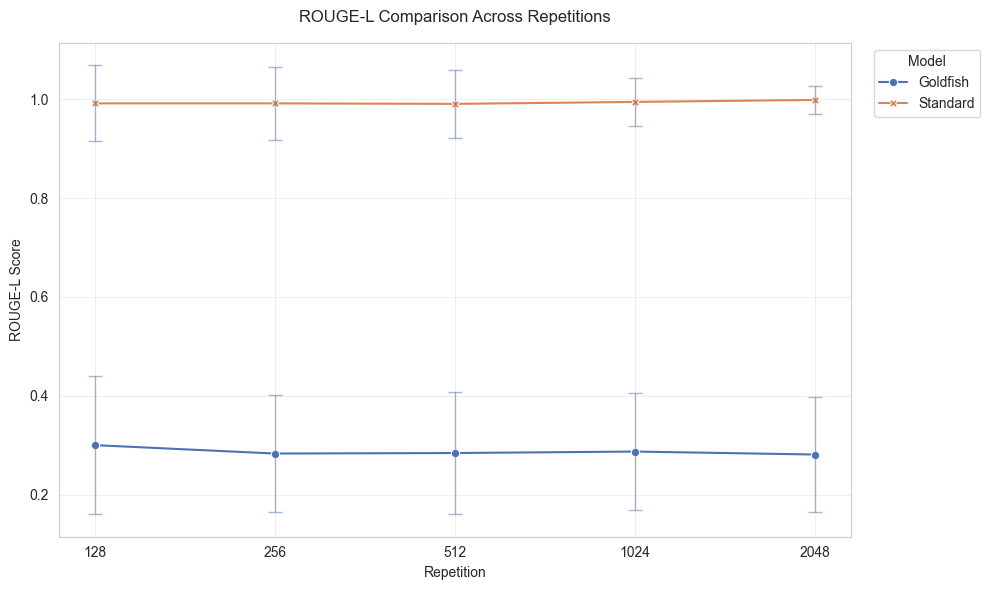

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style
sns.set_style("whitegrid")

# Create the data
repetitions = np.array([128, 256, 512, 1024, 2048])

# Experiment data
goldfish_mean = np.array([0.300, 0.283, 0.284, 0.287, 0.281])
goldfish_std = np.array([0.139, 0.119, 0.124, 0.119, 0.116])
standard_mean = np.array([0.992, 0.992, 0.991, 0.995, 0.999])
standard_std = np.array([0.077, 0.074, 0.069, 0.048, 0.028])

# Create DataFrame for seaborn
data = pd.DataFrame({
    'Repetition': np.concatenate([repetitions, repetitions]),
    'ROUGE-L': np.concatenate([goldfish_mean, standard_mean]),
    'Std': np.concatenate([goldfish_std, standard_std]),
    'Model': ['Goldfish']*5 + ['Standard']*5
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_palette("deep")

# Plot with seaborn
ax = sns.lineplot(
    data=data,
    x='Repetition',
    y='ROUGE-L',
    hue='Model',
    style='Model',
    markers=True,
    dashes=False,
    err_style='bars',
    ci=None
)

# Add error bars manually for better control
for model in ['Goldfish', 'Standard']:
    mask = data['Model'] == model
    plt.errorbar(
        data[mask]['Repetition'],
        data[mask]['ROUGE-L'],
        yerr=data[mask]['Std'],
        fmt='none',
        capsize=5,
        capthick=1,
        elinewidth=1,
        alpha=0.5
    )

# Customize the plot
ax.set_xscale('log', base=2)
ax.set_xticks(repetitions)
ax.set_xticklabels(repetitions)

# Labels and title
plt.xlabel('Repetition')
plt.ylabel('ROUGE-L Score')
plt.title('ROUGE-L Comparison Across Repetitions', pad=15)

# Customize grid
plt.grid(True, which="major", linestyle='-', alpha=0.3)
plt.grid(True, which="minor", linestyle=':', alpha=0.2)

# Legend
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()